In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import x_sin, sin_cos, generate_data, lstm_model

In [2]:
LOG_DIR = './ops_logs'
TIMESTEPS = 30
RNN_LAYERS = [{'steps': TIMESTEPS}]
DENSE_LAYERS = None
TRAINING_STEPS = 10000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

In [3]:
regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
                                      verbose=1,  steps=TRAINING_STEPS, optimizer='Adagrad',
                                      learning_rate=0.03, batch_size=BATCH_SIZE)

In [4]:
X, y = generate_data(np.sin, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'], n_classes=0,
                                                      print_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], validation_monitor, logdir=LOG_DIR)

Step #100, epoch #1, avg. train loss: 0.03505, avg. val loss: 0.02393
Step #200, epoch #2, avg. train loss: 0.00125, avg. val loss: 0.00113
Step #300, epoch #3, avg. train loss: 0.00080, avg. val loss: 0.00070
Step #400, epoch #4, avg. train loss: 0.00054, avg. val loss: 0.00048
Step #500, epoch #6, avg. train loss: 0.00040, avg. val loss: 0.00035
Step #600, epoch #7, avg. train loss: 0.00030, avg. val loss: 0.00027
Step #700, epoch #8, avg. train loss: 0.00024, avg. val loss: 0.00022
Step #800, epoch #9, avg. train loss: 0.00020, avg. val loss: 0.00018
Step #900, epoch #11, avg. train loss: 0.00018, avg. val loss: 0.00016
Step #1000, epoch #12, avg. train loss: 0.00016, avg. val loss: 0.00014
Step #1100, epoch #13, avg. train loss: 0.00015, avg. val loss: 0.00013
Step #1200, epoch #14, avg. train loss: 0.00013, avg. val loss: 0.00012
Step #1300, epoch #16, avg. train loss: 0.00013, avg. val loss: 0.00011
Step #1400, epoch #17, avg. train loss: 0.00011, avg. val loss: 0.00010
Step #150

TensorFlowEstimator(continue_training=False, optimizer=Adagrad, verbose=1, learning_rate=0.03, batch_size=100, steps=10000, n_classes=0, clip_gradients=5.0, class_weight=None)

In [8]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

MSE: 0.000009


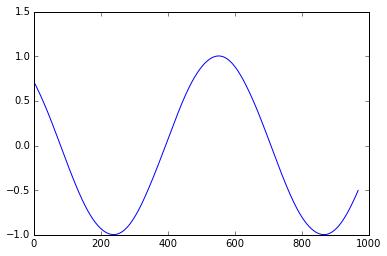

In [9]:
plt.plot(predicted)

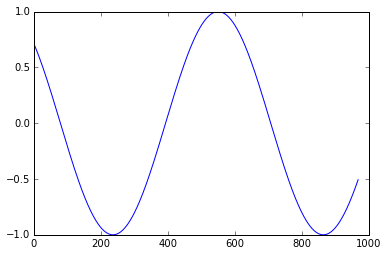

In [10]:
plt.plot(y['test'])

In [11]:
LOG_DIR = './ops_logs'
TIMESTEPS = 30
RNN_LAYERS = [{'steps': TIMESTEPS}]
DENSE_LAYERS = None
TRAINING_STEPS = 10000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
                                      verbose=1,  steps=TRAINING_STEPS, optimizer='Adagrad',
                                      learning_rate=0.03, batch_size=BATCH_SIZE)

In [12]:
X, y = generate_data(sin_cos, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'], n_classes=0,
                                                      print_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], validation_monitor, logdir=LOG_DIR)

Step #100, epoch #1, avg. train loss: 0.08302, avg. val loss: 0.07290
Step #200, epoch #2, avg. train loss: 0.00014, avg. val loss: 0.00011
Step #300, epoch #3, avg. train loss: 0.00008, avg. val loss: 0.00006
Step #400, epoch #4, avg. train loss: 0.00005, avg. val loss: 0.00004
Step #500, epoch #6, avg. train loss: 0.00004, avg. val loss: 0.00003
Step #600, epoch #7, avg. train loss: 0.00003, avg. val loss: 0.00003
Step #700, epoch #8, avg. train loss: 0.00002, avg. val loss: 0.00002
Step #800, epoch #9, avg. train loss: 0.00002, avg. val loss: 0.00002
Step #900, epoch #11, avg. train loss: 0.00002, avg. val loss: 0.00002
Step #1000, epoch #12, avg. train loss: 0.00001, avg. val loss: 0.00001
Step #1100, epoch #13, avg. train loss: 0.00001, avg. val loss: 0.00001
Step #1200, epoch #14, avg. train loss: 0.00001, avg. val loss: 0.00001
Step #1300, epoch #16, avg. train loss: 0.00001, avg. val loss: 0.00001
Step #1400, epoch #17, avg. train loss: 0.00001, avg. val loss: 0.00001
Step #150

TensorFlowEstimator(continue_training=False, optimizer=Adagrad, verbose=1, learning_rate=0.03, batch_size=100, steps=10000, n_classes=0, clip_gradients=5.0, class_weight=None)

In [13]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

MSE: 0.000001


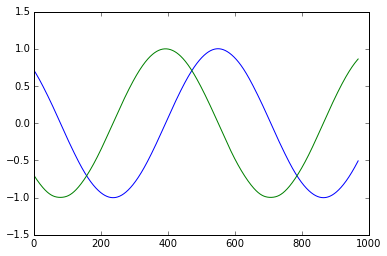

In [14]:
plt.plot(predicted)

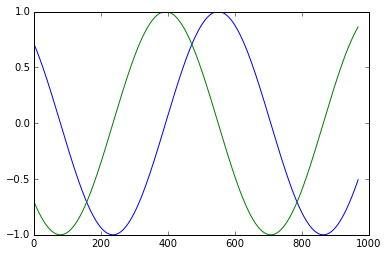

In [15]:
plt.plot(y['test'])

In [19]:
LOG_DIR = './ops_logs'
TIMESTEPS = 40
RNN_LAYERS = [{'steps': TIMESTEPS}]
DENSE_LAYERS = [2]
TRAINING_STEPS = 130000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), n_classes=0,
                                      verbose=1,  steps=TRAINING_STEPS, optimizer='Adagrad',
                                      learning_rate=0.03, batch_size=BATCH_SIZE)

In [ ]:
X, y = generate_data(x_sin, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)

In [ ]:
# create a lstm instance and validation monitor
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'], n_classes=0,
                                                      print_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)
regressor.fit(X['train'], y['train'], validation_monitor, logdir=LOG_DIR)

In [20]:
predicted = regressor.predict(X['test'])
score = mean_squared_error(predicted, y['test'])
print "MSE: {}".format(score)

MSE: 61.024454351


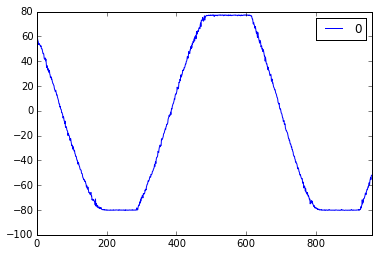

In [8]:
plt.plot(predicted)

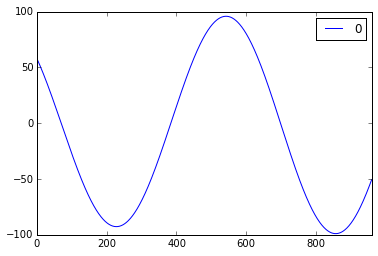

In [14]:
plt.plot(y['test'])

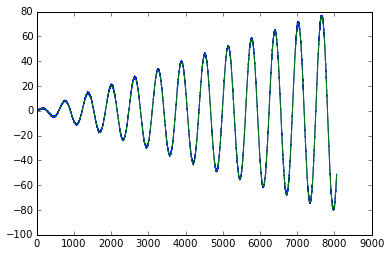

In [19]:
plt.plot(regressor.predict(X['train']))
plt.plot(y['train'])